In [1]:
from ipynb.fs.full.Essentials import *
import numpy as np

from sklearn.preprocessing import StandardScaler

In [2]:
a = np.load('Data_Average.npz', allow_pickle=True)

In [3]:
x1 = a['X_test_1']
x2 = a['X_train_1']

y1 = a['Y_test_1']
y2 = a['Y_train_1']

In [4]:
timestamp1 = y1[:, 1]
timestamp2 = y2[:, 1]

y1 = y1[:, 0].reshape(len(y1), 1)
y1 = y1.astype(np.float64)
y2 = y2[:, 0].reshape(len(y2), 1)
y2 = y2.astype(np.float64)

In [5]:
y1.shape

(74, 1)

In [6]:
class TestSoftSensor(SoftSensor):
    def __init__(self, x_train, y_train):
        super().__init__('Test')
        self.x_scaler = StandardScaler() 
        self.y_scaler = StandardScaler()
        self.x_scaler.fit(x_train)
        self.y_scaler.fit(y_train)
        self.train(x_train, y_train)

    def prepocessing(self, x):
        try:
            return self.x_scaler.transform(x)
        except:
            try:
               return self.y_scaler.transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err
            

    def postprocessing(self, x):
        try:
            return self.x_scaler.inverse_transform(x)
        except:
            try:
               return self.y_scaler.inverse_transform(x)
            except BaseException as err:
                print("Ошибка скейлера")
                raise err

    def evaluate_model(self, x):
        preproc_x = self.prepocessing(x)
        return np.zeros([len(x), 1]) + self.get_model()


    def train(self, x_train, y_train):
        preproc_y = self.prepocessing(y_train)
        self.set_model(preproc_y.mean())


    def __str__(self):
        return f"Тестовая модель, вычисляющее среднее. Для этого экземпляра model_avg = {self.get_model()}, после постобработки avg = {self.postprocessing(self.get_model().reshape(1,1))}"

In [7]:
Test_sensor_1 = TestSoftSensor(x2, y2)

In [8]:
print(Test_sensor_1)

Тестовая модель, вычисляющее среднее. Для этого экземпляра model_avg = 8.258501095457305e-16, после постобработки avg = [[57.27368421]]


In [9]:
metric = R2Metric()

In [10]:
Test_sensor_1.test(x1, y1, metric)

(array([[57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57.27368421],
        [57

In [11]:
test_visual = Visualizer(x1, y1, timestamp1, [metric], 'Test SoftSensor R2 metric')

      Coefficient of determination
Test                     -0.004859


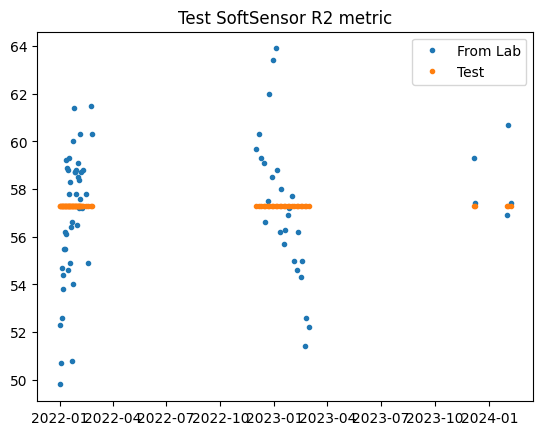

In [12]:
test_visual.visualize([Test_sensor_1])